In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import math
import random
import pprint
import numpy as np
# import cv2
sys.path.append('../..')


from mrcnn.utils      import command_line_parser, Paths
from mrcnn.visualize  import display_images
from mrcnn.dataset    import Dataset
from mrcnn.datagen    import load_image_gt
from importlib        import reload
from mrcnn.newshapes2 import NewImagesDataset
import mrcnn.prep_notebook as prep
import mrcnn.visualize     as visualize
import mrcnn.utils         as utils

# from mrcnn.shapes     import ShapesConfig
# from mrcnn.newshapes2 import NewShapesConfig, NewShapesDataset
# import mrcnn.newshapes2 as newshapes

pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)
 

# input_parms +="--fcn_model /home/kbardool/models/train_fcn_adagrad/shapes20180709T1732/fcn_shapes_1167.h5"
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = command_line_parser()
input_parms = " --batch_size 1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
input_parms +=" --mrcnn_model    last "
input_parms +=" --scale_factor     1"
input_parms +=" --sysout        screen "
input_parms +=" --new_log_folder   "
# input_parms +="--fcn_logs_dir   train_fcn8_newshapes "
# input_parms += "--epochs 2 --steps_in_epoch 32  --last_epoch 0 --lr 0.00001 --val_steps 8 " 
# input_parms +="--fcn_model      init "
# input_parms +="--opt            adam "
# input_parms +="--fcn_arch       fcn8 " 
# input_parms +="--fcn_layers     all " 

print(input_parms)

args = parser.parse_args(input_parms.split())


config = prep.build_newshapes_config(model = 'mrcnn', args = args, mode = 'training', verbose= 0)

Using TensorFlow backend.


 --batch_size 1   --mrcnn_logs_dir train_mrcnn_newshapes  --mrcnn_model    last  --scale_factor     1 --sysout        screen  --new_log_folder   
>>> Initialize Paths
 System Platform:  Windows


In [27]:
# from matplotlib      import colors 
# a = [colors.CSS4_COLORS['lightblue'],
#                           colors.CSS4_COLORS['deepskyblue'],  
#                           colors.CSS4_COLORS['skyblue'],  
#                           colors.CSS4_COLORS['lightskyblue'],  
#                           colors.CSS4_COLORS['steelblue'],  
#                           colors.CSS4_COLORS['aliceblue']]
# b = [(colors.to_rgba_array(color)*255)[0,:3] for color in a]
# print(a[0])
# print(b)


# del sys.modules['mrcnn.Image'] 
# del sys.modules['mrcnn.newshapes'] 
# del dataset_test


# pp.pprint(sys.modules)
# reload(mrcnn.Image)
# from mrcnn.Image import Image
# from IPython.lib.deepreload import reload
# reload(MyPak) 
pp.pprint(sys.modules)


[autoreload of mrcnn.Image failed: Traceback (most recent call last):
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 385, in superreload
    update_generic(old_obj, new_obj)
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 324, in update_generic
    update(a, b)
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 279, in update_class
    if old_obj == new_obj:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
]


{ '0fd5d10b620a796c75712df632cbfc80': <module '0fd5d10b620a796c75712df632cbfc80'>,
  '180f885a12415d5da2cfeb096b6f25ed': <module '180f885a12415d5da2cfeb096b6f25ed'>,
  '370952f8c4aeef6a58f34a1ff7a1852c': <module '370952f8c4aeef6a58f34a1ff7a1852c'>,
  '4f9f37f67cd5c931bdc319c1d3a2e3c8': <module '4f9f37f67cd5c931bdc319c1d3a2e3c8'>,
  '5bd6b75204250450d6284c8ba43c75d4': <module '5bd6b75204250450d6284c8ba43c75d4'>,
  '5c30daec6f61142d2774d4179af40151': <module '5c30daec6f61142d2774d4179af40151'>,
  '5c86bddf7eb6ce13936182e16be5d684': <module '5c86bddf7eb6ce13936182e16be5d684'>,
  '6fd47d1e129298d5675f4daa66bb2f90': <module '6fd47d1e129298d5675f4daa66bb2f90'>,
  '759a18c65b3aa0ffbcb63fe11c8e335a': <module '759a18c65b3aa0ffbcb63fe11c8e335a'>,
  '7d325f00dd183f9adc46b61045da952f': <module '7d325f00dd183f9adc46b61045da952f'>,
  '861e201e0625d11aad279a1545c64f53': <module '861e201e0625d11aad279a1545c64f53'>,
  '8bd82fab0007dc3311c92d26b3f40d4a': <module '8bd82fab0007dc3311c92d26b3f40d4a'>,
  'I

  'mpl_toolkits.axes_grid1.axes_size': <module 'mpl_toolkits.axes_grid1.axes_size' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\mpl_toolkits\\axes_grid1\\axes_size.py'>,
  'mpl_toolkits.axes_grid1.colorbar': <module 'mpl_toolkits.axes_grid1.colorbar' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\mpl_toolkits\\axes_grid1\\colorbar.py'>,
  'mpl_toolkits.axes_grid1.mpl_axes': <module 'mpl_toolkits.axes_grid1.mpl_axes' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\mpl_toolkits\\axes_grid1\\mpl_axes.py'>,
  'mpl_toolkits.axes_grid1.parasite_axes': <module 'mpl_toolkits.axes_grid1.parasite_axes' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\mpl_toolkits\\axes_grid1\\parasite_axes.py'>,
  'mpl_toolkits.mplot3d': <module 'mpl_toolkits.mplot3d' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\mpl_toolkits\\mplot3d\\__init__.py'>,
  'mpl_toolkits.mplot3d.art3d': <module 'mpl_toolkits.mplot3d.art3d' 

  'scipy.linalg.linalg_version': <module 'scipy.linalg.linalg_version' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\scipy\\linalg\\linalg_version.py'>,
  'scipy.linalg.matfuncs': <module 'scipy.linalg.matfuncs' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\scipy\\linalg\\matfuncs.py'>,
  'scipy.linalg.misc': <module 'scipy.linalg.misc' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\scipy\\linalg\\misc.py'>,
  'scipy.linalg.special_matrices': <module 'scipy.linalg.special_matrices' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\scipy\\linalg\\special_matrices.py'>,
  'scipy.misc': <module 'scipy.misc' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\scipy\\misc\\__init__.py'>,
  'scipy.misc.common': <module 'scipy.misc.common' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\scipy\\misc\\common.py'>,
  'scipy.misc.doccer': <module 'scipy.misc.doccer' from 'D:\\Program Files\\

  'tensorflow.contrib.learn.python.learn.datasets.base': <module 'tensorflow.contrib.learn.python.learn.datasets.base' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\tensorflow\\contrib\\learn\\python\\learn\\datasets\\base.py'>,
  'tensorflow.contrib.learn.python.learn.datasets.mnist': <module 'tensorflow.contrib.learn.python.learn.datasets.mnist' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\tensorflow\\contrib\\learn\\python\\learn\\datasets\\mnist.py'>,
  'tensorflow.contrib.learn.python.learn.datasets.synthetic': <module 'tensorflow.contrib.learn.python.learn.datasets.synthetic' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\tensorflow\\contrib\\learn\\python\\learn\\datasets\\synthetic.py'>,
  'tensorflow.contrib.learn.python.learn.datasets.text_datasets': <module 'tensorflow.contrib.learn.python.learn.datasets.text_datasets' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\tensorflow\\contrib\\learn\\pyth

  'tensorflow.python.ops.parsing_ops': <module 'tensorflow.python.ops.parsing_ops' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\tensorflow\\python\\ops\\parsing_ops.py'>,
  'tensorflow.python.ops.partitioned_variables': <module 'tensorflow.python.ops.partitioned_variables' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\tensorflow\\python\\ops\\partitioned_variables.py'>,
  'tensorflow.python.ops.random_ops': <module 'tensorflow.python.ops.random_ops' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\tensorflow\\python\\ops\\random_ops.py'>,
  'tensorflow.python.ops.resource_variable_ops': <module 'tensorflow.python.ops.resource_variable_ops' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\tensorflow\\python\\ops\\resource_variable_ops.py'>,
  'tensorflow.python.ops.resources': <module 'tensorflow.python.ops.resources' from 'D:\\Program Files\\Anaconda3\\envs\\TF\\lib\\site-packages\\tensorflow\\python\\ops\\resou

In [170]:
    np_format = {}
    np_format['float'] = lambda x: "%10.4f" % x
    np_format['int']   = lambda x: "%10d" % x
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [830]:
# del NewImagesDataset
try:
    del sys.modules['mrcnn.newshapes2'],sys.modules['mrcnn.Image']
except:
    pass
from mrcnn.newshapes2 import NewImagesDataset
try:
    del dataset_test
except:
    print(' dataset_test doesnt exist ')

dataset_test  = NewImagesDataset(config)

 Generate new object type : person  for  mrcnn
Active Class Info in  mrcnn
------------------------------------
[   {'category': 'background', 'id': 0, 'img_count': 0, 'name': 'BG', 'source': ''},
    {'category': None, 'id': 1, 'img_count': 0, 'name': 'person', 'source': 'shapes'},
    {'category': None, 'id': 2, 'img_count': 0, 'name': 'car', 'source': 'shapes'},
    {'category': None, 'id': 3, 'img_count': 0, 'name': 'sun', 'source': 'shapes'},
    {'category': None, 'id': 4, 'img_count': 0, 'name': 'building', 'source': 'shapes'},
    {'category': None, 'id': 5, 'img_count': 0, 'name': 'tree', 'source': 'shapes'},
    {'category': None, 'id': 6, 'img_count': 0, 'name': 'cloud', 'source': 'shapes'}]


In [831]:
dataset_test.load_images(100, verbose = False)
dataset_test.prepare()

 Dataset test currently has : 0  images defined...
 Adding  100 images
 Add image --->  0
-----------------------------

===> build_test_add_object():  Image currently has  0   shapes
   - Build  BUILDING  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.0 ()

===> build_test_add_object():  Image currently has  1   shapes
   - Build  TREE  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.0 ()

===> build_test_add_object():  Image currently has  2   shapes
   - Build  TREE  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.21428572 ()

===> build_test_add_object():  Image currently has  3   shapes
   - Build  TREE  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.0 ()

===> build_test_add_object():  Image currently has  4   shapes
   - Build  TREE  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.04047619 ()

===> b

   - Build  CAR  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.22222222 ()

===> build_test_add_object():  Image currently has  7   shapes
   - Build  CLOUD  object, try #  0
     Build failed - max_occlusion encounted is:  0.7 ()  ... Retry building object
   - Build  CLOUD  object, try #  1
     Build succeeded - max_occlusion encounted on try #  1  is:  0.4 ()

===> build_test_add_object():  Image currently has  8   shapes
   - Build  CLOUD  object, try #  0
     Build failed - max_occlusion encounted is:  0.5769231 ()  ... Retry building object
   - Build  CLOUD  object, try #  1
     Build failed - max_occlusion encounted is:  0.55172414 ()  ... Retry building object
   - Build  CLOUD  object, try #  2
     Build failed - max_occlusion encounted is:  0.6855469 ()  ... Retry building object
   - Build  CLOUD  object, try #  3
     Build failed - max_occlusion encounted is:  0.78571427 ()  ... Retry building object
   - Build  CLOUD  object, try

===> build_test_add_object():  Image currently has  11   shapes
   - Build  SUN  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.234375 ()

===> build_test_add_object():  Image currently has  12   shapes
   - Build  CLOUD  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.3675115 ()

===> build_test_add_object():  Image currently has  13   shapes
   - Build  CLOUD  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.195 ()

===> build_test_add_object():  Image currently has  14   shapes
   - Build  PERSON  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.0 ()

===> build_test_add_object():  Image currently has  0   shapes
   - Build  BUILDING  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.0 ()

===> build_test_add_object():  Image currently has  1   shapes
   - Build  TREE  object, try #  0
     Build succeeded - 

   - Build  PERSON  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.16666667 ()

===> build_test_add_object():  Image currently has  0   shapes
   - Build  BUILDING  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.0 ()

===> build_test_add_object():  Image currently has  1   shapes
   - Build  BUILDING  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.30392858 ()

===> build_test_add_object():  Image currently has  2   shapes
   - Build  BUILDING  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.41666666 ()

===> build_test_add_object():  Image currently has  3   shapes
   - Build  TREE  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.0 ()

===> build_test_add_object():  Image currently has  4   shapes
   - Build  TREE  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.26666668

     Build failed - max_occlusion encounted is:  0.625 ()  ... Retry building object
   - Build  TREE  object, try #  1
     Build succeeded - max_occlusion encounted on try #  1  is:  0.0 ()

===> build_test_add_object():  Image currently has  3   shapes
   - Build  TREE  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.2413793 ()

===> build_test_add_object():  Image currently has  4   shapes
   - Build  TREE  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.0 ()

===> build_test_add_object():  Image currently has  5   shapes
   - Build  TREE  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.4227273 ()

===> build_test_add_object():  Image currently has  6   shapes
   - Build  CAR  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.0 ()

===> build_test_add_object():  Image currently has  7   shapes
   - Build  SUN  object, try #  0
     Build succ

     Build succeeded - max_occlusion encounted on try #  0  is:  0.0 ()

===> build_test_add_object():  Image currently has  7   shapes
   - Build  SUN  object, try #  0
     Build succeeded - max_occlusion encounted on try #  0  is:  0.0 ()

===> build_test_add_object():  Image currently has  8   shapes
   - Build  PERSON  object, try #  0
     Build failed - max_occlusion encounted is:  0.7368421 ()  ... Retry building object
   - Build  PERSON  object, try #  1
     Build succeeded - max_occlusion encounted on try #  1  is:  0.0 ()

===> build_test_add_object():  Image currently has  9   shapes
   - Build  CLOUD  object, try #  0
     Build failed - max_occlusion encounted is:  0.8235294 ()  ... Retry building object
   - Build  CLOUD  object, try #  1
     Build failed - max_occlusion encounted is:  0.7291667 ()  ... Retry building object
   - Build  CLOUD  object, try #  2
     Build failed - max_occlusion encounted is:  0.85294116 ()  ... Retry building object
   - Build  CLOUD  

TypeError: 'NoneType' object is not subscriptable

[autoreload of mrcnn.Image failed: Traceback (most recent call last):
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 385, in superreload
    update_generic(old_obj, new_obj)
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 324, in update_generic
    update(a, b)
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 279, in update_class
    if old_obj == new_obj:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
]


 ===> Loading image * image_id :  0
 ===> Loading image * image_id :  1


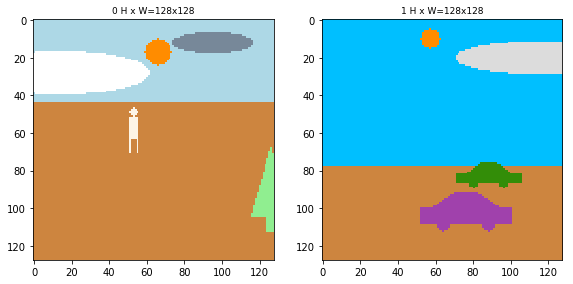

In [802]:
image_list = dataset_test.image_ids.tolist()
# image_list = list(range(90,99))
images = prep.get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = [str(i) for i in image_list], cols = 5, width = 25)

 ===> Loading image * image_id :  89


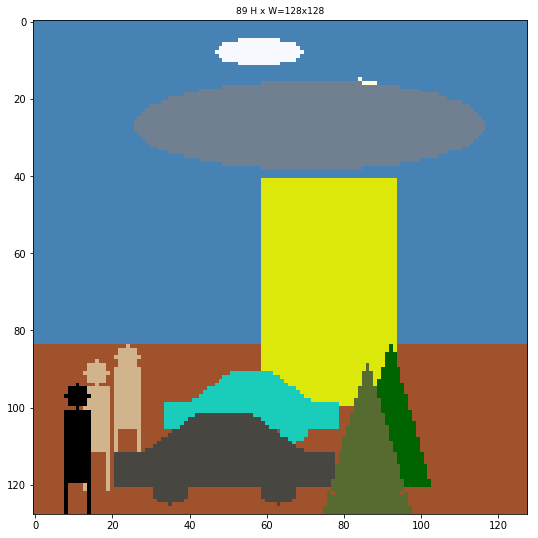

In [707]:
# image_list = dataset_test.image_ids.tolist()
IMAGE_ID = 89
image_list = [IMAGE_ID]
images = prep.get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = [str(i) for i in image_list], cols = 1, width = 10)

### experiment non maximal suppression

In [708]:
from mrcnn.Image import debug_non_max_suppression_2
pp.pprint(dataset_test.image_info[IMAGE_ID]['shapes'])
# boxes = []
# for shp in dataset_test.image_info[1]['shapes']:
#     x, y, sx, sy = shp[2]
#     boxes.append([y - sy, x - sx, y + sy, x + sx])

# pp.pprint(boxes)    
# N = len(boxes)
# print(' number of boxes ',N )

[ ('cloud', array([  248.0000,   248.0000,   255.0000]), (58, 8, 11, 3)),
  ('sun', array([  255.0000,   255.0000,   224.0000]), (84, 24, 9, 9)),
  ('cloud', array([  112.0000,   128.0000,   144.0000]), (71, 27, 45, 11)),
  ('building', (220.0, 231.0, 10.0), (76, 70, 17, 29)),
  ('car', (26.0, 205.0, 186.0), (56, 102, 22, 11)),
  ('person', array([  210.0000,   180.0000,   140.0000]), (24, 102, 3, 15)),
  ('tree', array([    0.0000,   100.0000,     0.0000]), (92, 102, 5, 23)),
  ('person', array([  210.0000,   180.0000,   140.0000]), (16, 108, 3, 17)),
  ('car', (72.0, 70.0, 64.0), (49, 116, 28, 14)),
  ('person', array([    0.0000,     0.0000,     0.0000]), (11, 116, 3, 19)),
  ('tree', array([   85.0000,   107.0000,    47.0000]), (86, 113, 7, 30))]


In [709]:
keep_ixs =  debug_non_max_suppression_2(dataset_test.image_info[IMAGE_ID]['shapes'], 0.29, 1)

====> non_max_suppression 
scr: 0    [         5         47         11         69]     132      cloud    CY/CX:    8 58
scr: 1    [        15         75         33         93]     324      sun    CY/CX:    24 84
scr: 2    [        16         26         38        116]     1980      cloud    CY/CX:    27 71
scr: 3    [        41         59         99         93]     1972      building    CY/CX:    70 76
scr: 4    [        91         34        113         78]     968      car    CY/CX:    102 56
scr: 5    [        87         21        117         27]     180      person    CY/CX:    102 24
scr: 6    [        79         87        125         97]     460      tree    CY/CX:    102 92
scr: 7    [        91         13        125         19]     204      person    CY/CX:    108 16
scr: 8    [       102         21        130         77]     1568      car    CY/CX:    116 49
scr: 9    [        97          8        135         14]     228      person    CY/CX:    116 11
scr: 10    [        83    

In [762]:
def get_max_occlusion(new_shape, other_shapes, threshold = 0.5, verbose = False ):
    '''
    Determined occlusion between new_shape and existing shapes  
    boxes: [N, (y1, x1, y2, x2)]. Notice that (y2, x2) lays outside the box.
    scores: 1-D array of box scores.
    threshold: Float. IoU threshold to use for filtering.
    '''
    if verbose:
        print('====> get_max_occlusion  - len(other_shapes) :', len(other_shapes))

    x, y, sx, sy = new_shape[2]
    new_box = np.array([y - sy, x - sx, y + sy, x + sx])
    new_class = new_shape[0]
    new_area = (new_box[2] - new_box[0]) * (new_box[3] - new_box[1]) 
    
    boxes = []
    classes = []
    for shp in other_shapes:
        print(' class:', shp[0], '     box:', shp[2])
        x, y, sx, sy = shp[2]
        boxes.append([y - sy, x - sx, y + sy, x + sx])
        classes.append(shp[0])
    boxes   = np.array(boxes)
    print('       Boxes shape', boxes.shape)
    classes = np.array(classes)
    scores  = np.arange(len(boxes))
    areas = (boxes[:,2] - boxes[:,0]) * (boxes[:,3] - boxes[:,1]) 
    cy = boxes[:,0] + (boxes[:,2] - boxes[:,0]) //2
    cx = boxes[:,1] + (boxes[:,3] - boxes[:,1]) //2
    
    if verbose:
        print(' Test: ', new_box , '     area: ', new_area, '   class ', new_class)
        print('   against:')
        for box, cls, scr ,ar, y,x  in zip(boxes, classes, scores, areas, cy,cx):
            print( 'scr:', scr, '  ', box, '   ', ar,  '    ', cls,'   CY/CX:   ',y,x)

    # Compute cliiped box areas
    clipped_boxes = np.zeros_like(boxes)
    clp_y1 = clipped_boxes[:,0] = np.maximum(boxes[:, 0], 0)    ## y1
    clp_x1 = clipped_boxes[:,1] = np.maximum(boxes[:, 1], 0)    ## x1
    clp_y2 = clipped_boxes[:,2] = np.minimum(boxes[:, 2], 128)  ## y2
    clp_x2 = clipped_boxes[:,3] = np.minimum(boxes[:, 3], 128)  ## x2
    clp_areas = (clp_y2 - clp_y1) * (clp_x2 - clp_x1) 

    if verbose:
        print('====> After Clipping ')
        for box,cls,scr, ar in zip(clipped_boxes, classes, scores, clp_areas):
            print( 'scr:', scr, '  ', box, '   ', ar, '    ', cls)
    
    assert boxes.shape[0] > 0
    if boxes.dtype.kind != "f":
        boxes = boxes.astype(np.float32)
      
    # Get indicies of boxes sorted by scores (highest first)
    # ixs = scores.argsort()[::-1]
    # Get indicies of boxes sorted by Area (LOWEST first)
    # ixs = area.argsort()
    # Get indicies of boxes sorted by highest in image (Top objects  first)
    # ixs = boxes[:,0].argsort()

    # pick = []
    # if verbose:
        # print('====> After Sorting - sort indices: ', ixs)
        # for i in ixs : 
            # print( 'scr:', scores[i], '  ', clipped_boxes[i], '   ', area[i], '    ', classes[i])

    
    # while len(ixs) > 0:
    #     # Pick top box and add its index to the list
    #     i = ixs[0]
    #     cls = classes[i]
    #     pick.append(i)
        
        # Compute IoU of the picked box with the rest
    iou, inter, union, occlusion = debug_compute_iou_2(new_boxes, boxes, new_area, areas)
    if verbose:
        print()
        print(' **  ix : ', i, ' shape : ',classes[i],'     box:', boxes[i], '     ctr (x,y):   (', cx[i],',',cy[i],')', ' area: ', area[i])
        print('              ixs: ', ixs[1:])
        print('           clsses: ', ''.join( [i.rjust(11) for i in classes[ixs[1:]] ]))
        print('            areas: ', area[ixs[1:]] )   
        print('              iou: ', iou)
        print('     intersection: ', inter)
        print('            union: ', union)
        print('        occlusion: ', occlusion)

        # Identify boxes with IoU over the threshold. This returns indicies into ixs[1:], so add 1 to get
        # indicies into ixs.
        
        tst =  np.where(iou>threshold)
        remove_ixs = np.where(iou > threshold)[0] + 1
        
        # Remove indicies of the picked and overlapped boxes.
        # ixs = np.delete(ixs, remove_ixs)
        # ixs = np.delete(ixs, 0)

        if verbose:
            print('     np.where( iou > threshold) : ' ,tst, 'tst[0] (index into ixs[1:]: ', tst[0], 
                    ' remove_ixs (index into ixs) : ',remove_ixs)
            print('     ending ixs (after deleting ixs[0]): ', ixs, ' picked so far: ',pick)
    # if verbose:    
        # print('====> Final Picks: ', pick)

    return occlusion


###  experiment with pop() and remove()

In [506]:
from matplotlib      import colors
a = colors.to_rgba_array(colors.CSS4_COLORS['forestgreen'])[0,:3]
print(a, a.shape, type(a), a.dtype)
color = np.random.randint(0, 255, (3,), dtype = np.int32).astype(np.float32)
print(color, color.dtype)
a2 = (color[0], color[1], color[2])
print(a2, type(a2), type(a2[0]))
a3 = np.asscalar(color[0])
print(a3, type(a3), type(a3))

[    0.1333     0.5451     0.1333] (3,) <class 'numpy.ndarray'> float64
[  145.0000   182.0000   153.0000] float32
(145.0, 182.0, 153.0) <class 'tuple'> <class 'numpy.float32'>
145.0 <class 'float'> <class 'float'>


In [102]:
np_format = {}
np_format['float'] = lambda x: "%10.4f" % x
np_format['int']   = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)
x  = 73 
y  = 67 
sx = 11 
sy = 33
print(' Draw Tree')
print('    CX :', x, 'CY:', y , 'sx: ',sx , 'sy: ', sy)

for theta in [30, 45, 60,75, 80, 85, 87.5, 90]:
    sin_t = math.sin(math.radians(theta))

    ty = sy //3                # trunk length
    by = sy - ty               # body length
    tx = int((by/ sin_t)//5)   # trunk width
    bx = by / sin_t            # body width 
    points = np.array([[(x, y - by),                    ## top 
                        (x - bx, y + by),     ## left
                        (x + bx, y + by),     ## right 
                        ]], dtype=np.int32)
    print('   sin_t:', round(sin_t,4),'    Trunk Length : ', ty , 'Width: ', tx, ' Half Body Length :', by, '   Half Body Width: ', bx, '   points: ', points)
    print('   recatanglge :', x-tx,y+by,'   to  ', x+tx, y+by+ty)
# orde of points: top, left, right
# image = cv2.fillPoly(image, points, color)
# image = cv2.rectangle(image,(x-tx,y+by), (x+tx, y+by+ty),color, -1)



 Draw Tree
    CX : 73 CY: 67 sx:  11 sy:  33
   sin_t: 0.5     Trunk Length :  11 Width:  8  Half Body Length : 22    Half Body Width:  44.00000000000001    points:  [[[        73         45]
  [        28         89]
  [       117         89]]]
   recatanglge : 65 89    to   81 100
   sin_t: 0.7071     Trunk Length :  11 Width:  6  Half Body Length : 22    Half Body Width:  31.11269837220809    points:  [[[        73         45]
  [        41         89]
  [       104         89]]]
   recatanglge : 67 89    to   79 100
   sin_t: 0.866     Trunk Length :  11 Width:  5  Half Body Length : 22    Half Body Width:  25.403411844343534    points:  [[[        73         45]
  [        47         89]
  [        98         89]]]
   recatanglge : 68 89    to   78 100
   sin_t: 0.9659     Trunk Length :  11 Width:  4  Half Body Length : 22    Half Body Width:  22.776075969021825    points:  [[[        73         45]
  [        50         89]
  [        95         89]]]
   recatanglge : 69 89    

In [245]:
aa = ['a','b','c','a','a', 'b', 'z','d']
bb = ['z','b']

for i in bb:
    print(i)
    print('I ',i,' before :',bb)
    bb.remove(i)
    print('I ',i,' after  :', bb)

#     print(' bb is none:',  ' not bb is: ', not bb, ' len(bb) == 0 ', len(bb) == 0)
# i = 'b'
# print('I ',i,' before :',bb)
# bb.remove(i)
# print('I ',i,' after  :', bb)
# print(' bb is none:', bb is None, ' not (bb) is: ', not bb, ' len(bb) == 0 ', len(bb) == 0)

# i = 'z'
# print('I ',i,' before :',bb)
# bb.remove(i)
# print('I ',i,' after  :', bb)
# print(' bb is none:', bb is None, ' not bb is: ', not bb, ' len(bb) == 0 ', len(bb) == 0)

z
I  z  before : ['z', 'b']
I  z  after  : ['b']


In [99]:
aa = ['a','b','c','a','a', 'b', 'z','d']
bb = ['z','b']

for i in bb:
    while i in aa:
        aa.remove(i)
        print('removed ',i,' list is ', aa)


aa = ['a','b','c','a','a', 'b', 'z','d']
bb = ['z','b']

for i in bb:
    while True:
        print('trying ',i)
        try:
            pos = aa.index(i)
        except ValueError:
            break
        else:
            item = aa.pop(pos)
            print(' found in position ',pos,' item is ', item, 'remaining list: ', aa)


print(' remaining list: ', aa)

removed  z  list is  ['a', 'b', 'c', 'a', 'a', 'b', 'd']
removed  b  list is  ['a', 'c', 'a', 'a', 'b', 'd']
removed  b  list is  ['a', 'c', 'a', 'a', 'd']
trying  z
 found in position  6  item is  z remaining list:  ['a', 'b', 'c', 'a', 'a', 'b', 'd']
trying  z
trying  b
 found in position  1  item is  b remaining list:  ['a', 'c', 'a', 'a', 'b', 'd']
trying  b
 found in position  4  item is  b remaining list:  ['a', 'c', 'a', 'a', 'd']
trying  b
 remaining list:  ['a', 'c', 'a', 'a', 'd']


### display images

In [244]:
# image_list = dataset_test.image_ids.tolist()

# pp.pprint(dataset_test.image_info[1]['shapes'])
# image_list = [1]
image_list = [15,16,17,18,19,20,21,22,23,24]
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_test, image_list)
# print(len(images))
# print(images[0].shape)
visualize.display_images(images, titles = image_titles, cols = 5, width = 25)

IndexError: list index out of range

#### build, load and prepare dataset

In [2]:
# Build shape dataset        -----------------------------------------------
# Training dataset
# generate 500 shapes 
# del dataset_train
dataset_test = newshapes.NewShapesDataset(config)
dataset_test.load_shapes(10,10)
dataset_test.prepare()

Active Class Info
-----------------
[{'category': 'background', 'name': 'BG', 'source': '', 'id': 0, 'img_count': 0}, {'category': None, 'name': 'person', 'source': 'shapes', 'id': 1, 'img_count': 0}, {'category': None, 'name': 'car', 'source': 'shapes', 'id': 2, 'img_count': 0}, {'category': None, 'name': 'sun', 'source': 'shapes', 'id': 3, 'img_count': 0}, {'category': None, 'name': 'building', 'source': 'shapes', 'id': 4, 'img_count': 0}, {'category': None, 'name': 'tree', 'source': 'shapes', 'id': 5, 'img_count': 0}, {'category': None, 'name': 'cloud', 'source': 'shapes', 'id': 6, 'img_count': 0}]
Objct Choices
-----------------
['person', 'car', 'sun', 'building', 'tree', 'cloud']
remove sun
object_choices:  ['person', 'car', 'building', 'tree', 'cloud']
self.object_choices:  ['person', 'car', 'sun', 'building', 'tree', 'cloud']
remove sun
object_choices:  ['person', 'car', 'building', 'tree', 'cloud']
self.object_choices:  ['person', 'car', 'sun', 'building', 'tree', 'cloud']
rem

In [3]:
print(dataset_test.active_class_ids)
print(dataset_test.active_class_info)
j = [dataset_test.active_class_info[i]['name'] for i in dataset_test.active_class_info]
print(j)

[1, 2, 3, 4, 5, 6]
{1: {'name': 'person', 'ext_id': 1}, 2: {'name': 'car', 'ext_id': 2}, 3: {'name': 'sun', 'ext_id': 3}, 4: {'name': 'building', 'ext_id': 4}, 5: {'name': 'tree', 'ext_id': 5}, 6: {'name': 'cloud', 'ext_id': 6}}
['person', 'car', 'sun', 'building', 'tree', 'cloud']


In [25]:
# import pickle
# with open('newshapes_dataset.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
del dataset_test

with open("newshapes_dataset.pkl", 'rb') as infile:
    dataset_test = pickle.load(infile)

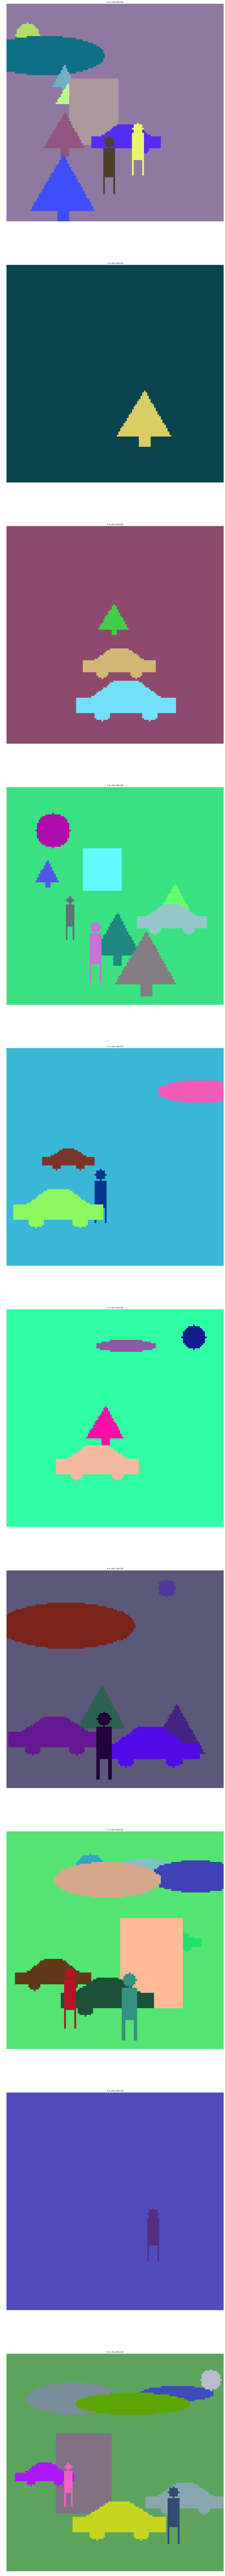

In [5]:
###  Display some images from dataset

image_list = list(range(0,10))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 1, width = 24)

 Image_id    :  8  Reference:  [('cloud', (206, 123, 105), (62, 22, 19, 6)), ('building', (180, 190, 152), (100, 42, 10, 10)), ('building', (27, 118, 10), (69, 47, 11, 12)), ('car', (200, 239, 174), (105, 96, 26, 13)), ('car', (38, 39, 144), (31, 101, 27, 13))] Coco Id: 8
 Image meta  :  [  8 128 128   3   0   0 128 128   1   1]
 Class ids   :  (5,)    [6 4 4 2 2]
 Class Names :  ['cloud', 'building', 'building', 'car', 'car']


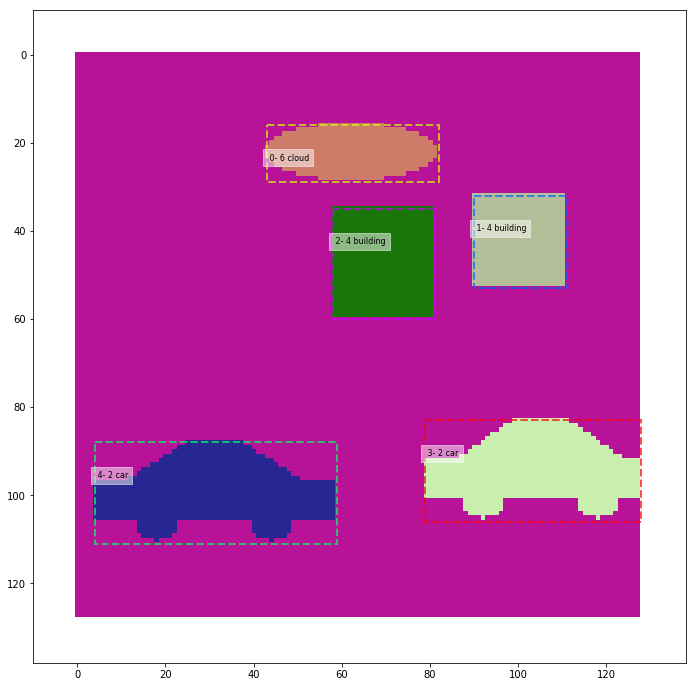

In [12]:
visualize.display_image_gt(dataset_test,mrcnn_config,8)
 

###  Display Images 

[3 6]
[1]
[3 6 4 4 4 1 2 1 5]
[3 6 6 5 4 1 2 1 2 1 1]
[3]
[3 4 2]
[3 6 6 4 5 5 1]
[3 6 1 5]
[3 6 6 6 6 4 4 4 4 5]
[6]
[4]
[3 6 6 1 5 2 4 1 2]
[3 6 5 2 1 1 5 2 1 1]
[3 6 6 4 1]
[3]
[3 6 6 4 4 2 5]
[6 1 5 2]
[3 6 4 4 1 1]
[3 6 6 5 4 2 2 1 5 1]
[3 4 5 2 1]


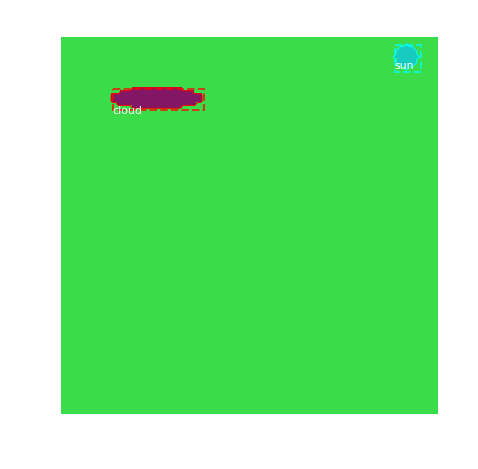

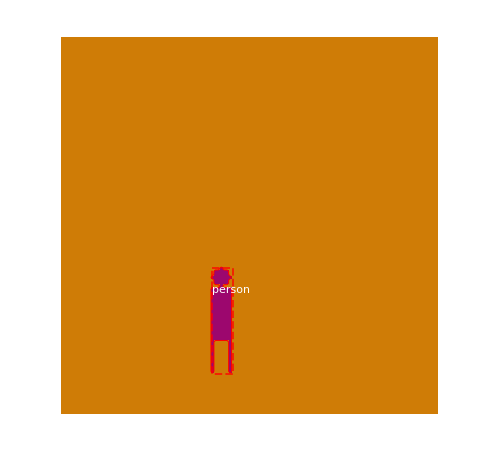

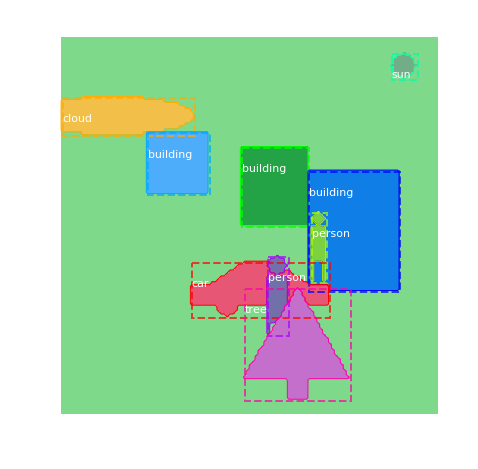

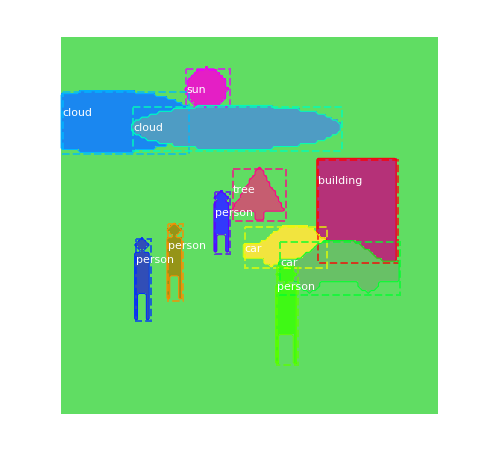

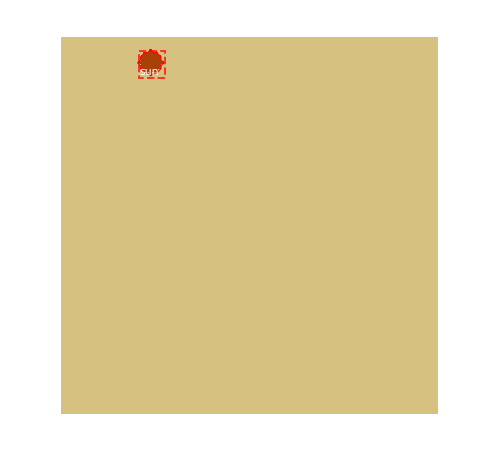

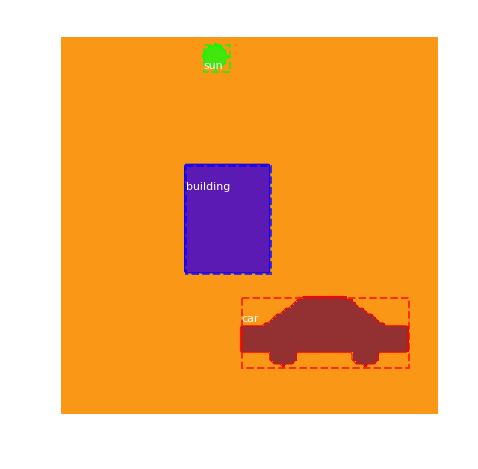

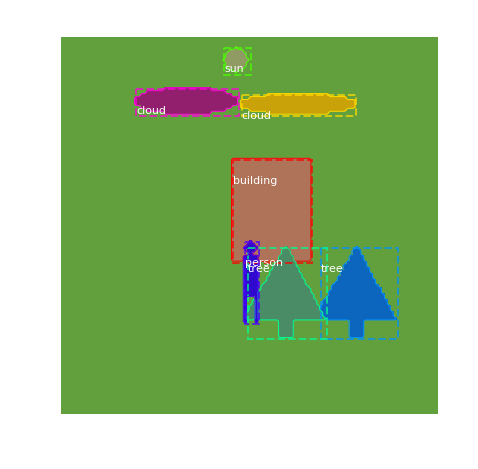

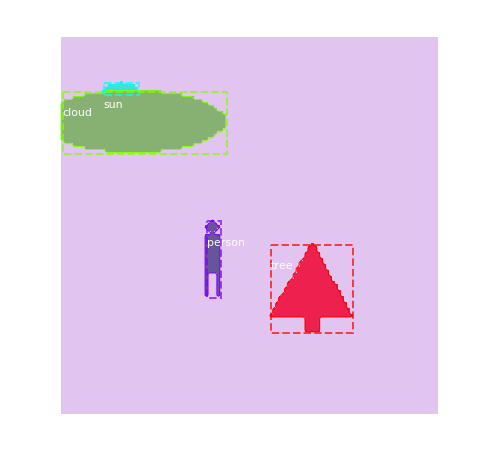

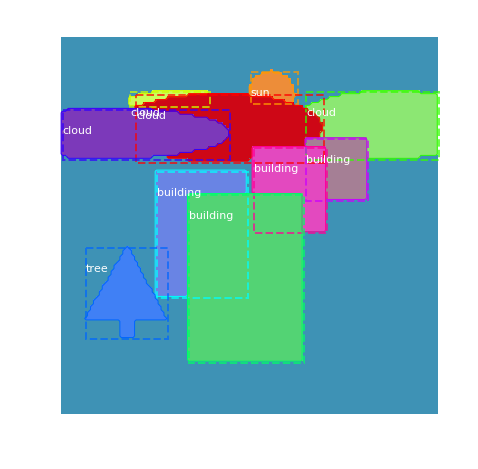

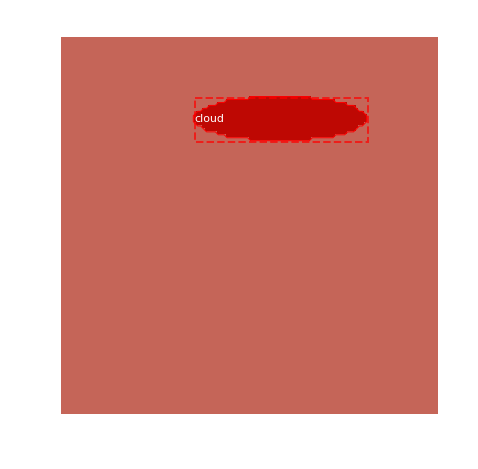

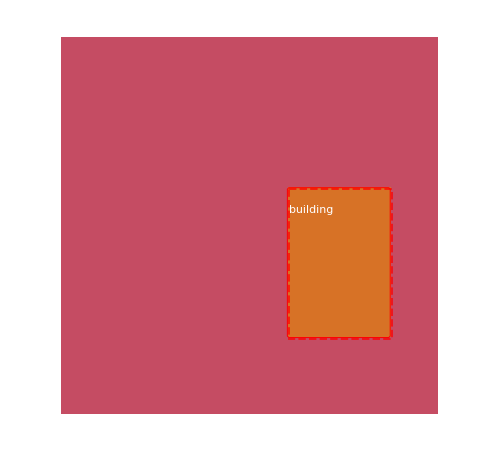

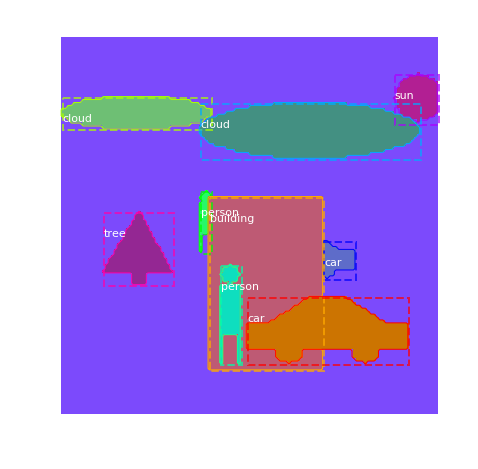

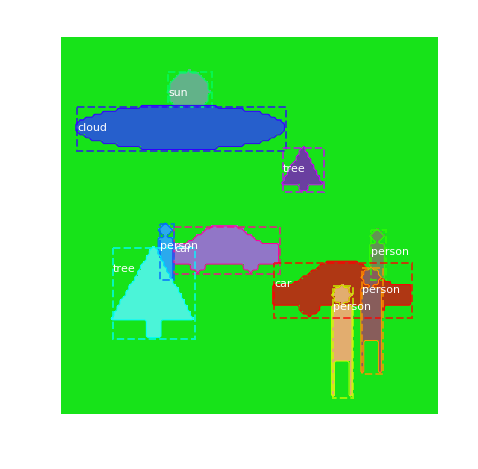

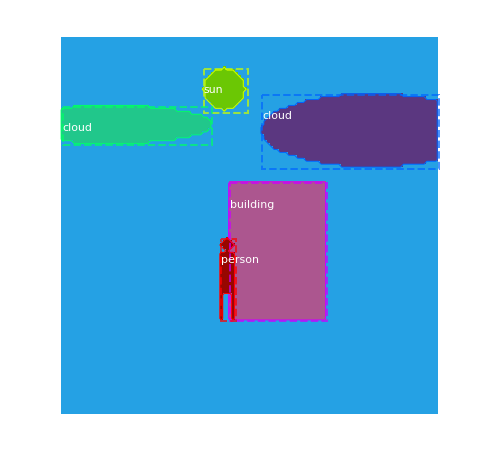

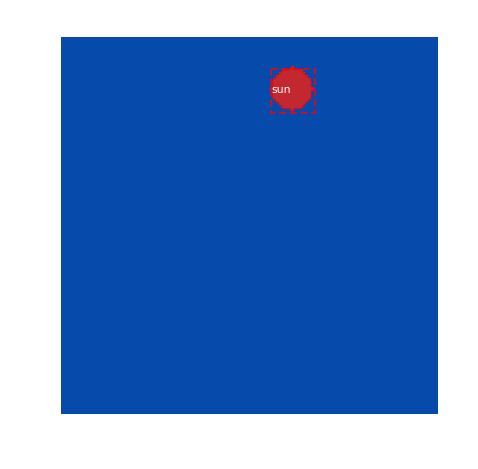

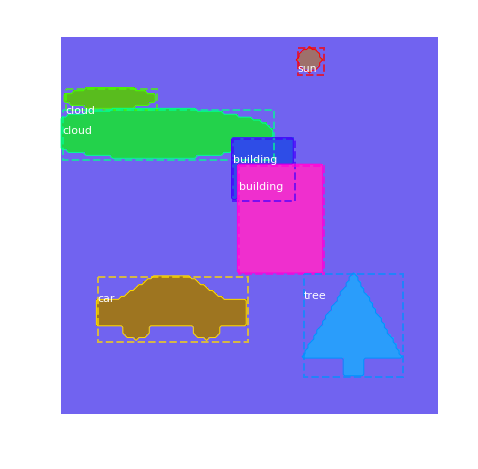

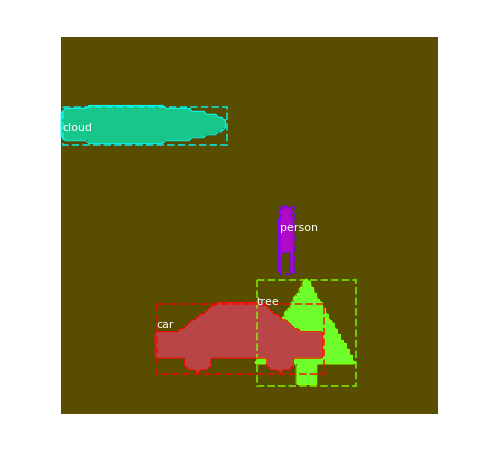

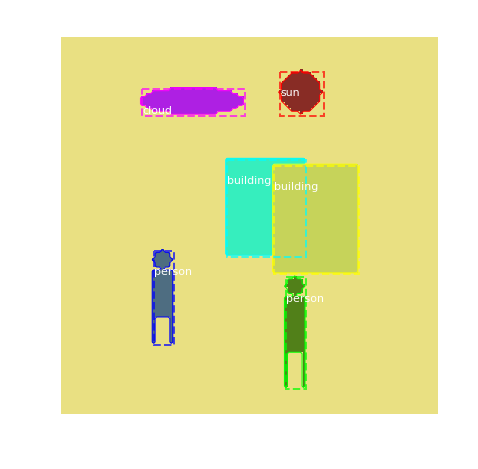

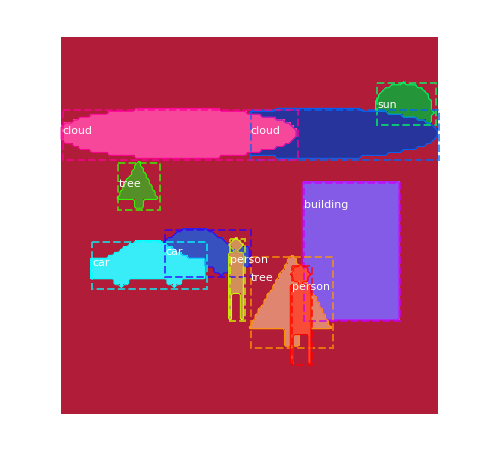

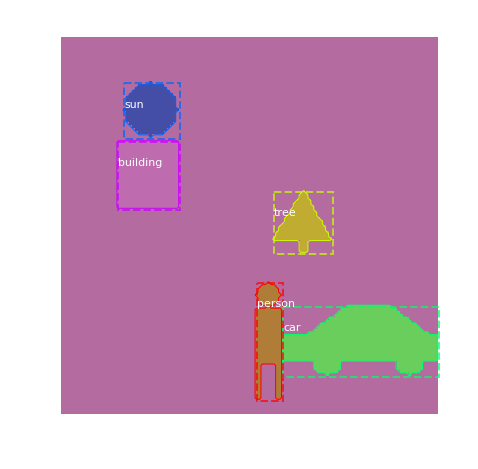

In [23]:
for image_id in range(len(test.image_ids)):
#     print('Classes (1: circle, 2: square, 3: triangle ): ',class_ids)
    image, image_meta, gt_class_ids, gt_boxes, gt_masks = \
                    load_image_gt(test, test_config, image_id, augment=False, use_mini_mask=False) 
        
#     print(test.image_info[image_id])
#     for shape, color, dims in test.image_info[image_id]['shapes']:        
#         x, y, sx, sy = dims
#         print(' Shape : {:20s}     Cntr (x,y): ({:3d} , {:3d})    Size_x: {:3d}   Size_y: {:3d}'.format(shape,x,y,sx, sy))            
#     print(gt_class_ids.shape, gt_boxes.shape, gt_masks.shape)
#     print(gt_boxes)
    print(gt_class_ids)
#     visualize.display_images([image], cols = 1, width = 8)                     
    visualize.display_instances(image, gt_boxes, gt_masks, gt_class_ids, test.class_names, figsize=(8, 8))
#     visualize.display_top_masks(image, gt_masks, gt_class_ids, test.class_names)
    

###  Construct a semi-random image 

In [6]:
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
color = tuple([random.randint(0, 255) for _ in range(3)])

image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)
for i in range(5):
    shape , color, dims = semi_random_shape(img_h, img_w )
    image = semi_draw_shape(image , shape, dims ,color)

display_images([image], cols = 1, width = 6)

NameError: name 'img_h' is not defined

###  Display one image

In [ ]:
image_index = 3
image_id = test.image_ids[image_index]
image, image_meta, gt_class_ids, gt_boxes, gt_masks = \
                load_image_gt(test, test_config, image_id, augment=False, use_mini_mask=False)
    
print(gt_class_ids.shape, gt_boxes.shape, gt_masks.shape)
print(gt_boxes)
print(gt_class_ids)
display_images([image], cols = 1, width = 6)
# draw_boxes(image, gt_boxes)    

### Experiemnt building shapes

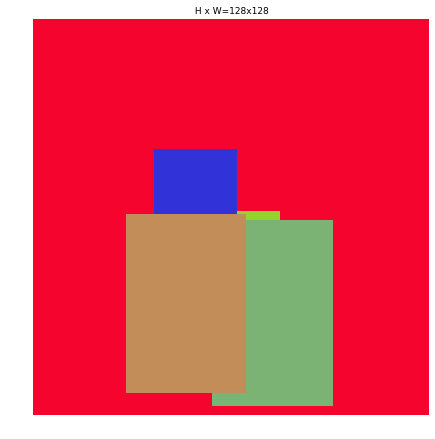

In [10]:
height , width = 128, 128
img_h, img_w = 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(4):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer
    max_range_x = width - buffer - 1           
    min_range_y = height //3
    max_range_y = 3 * height //4   ##* min_range_y
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)            


    min_height = 10
    max_height = 30
    sy = np.interp([y],[min_range_y, max_range_y], [min_height, max_height])    
    #     sy = random.randint(min_height, max_height)
#     sx = random.randint(5,15)
    sx = sy //2 + 5

    image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)      
display_images([image], cols = 1, width = 8)

###  Automobile

X : 113 y: 110      sx:  [24.1509] sy:  [12.]
X : 40 y: 102      sx:  [22.0377] sy:  [11.]
X : 113 y: 66      sx:  [12.5283] sy:  [6.]
X : 108 y: 84      sx:  [17.283] sy:  [8.]


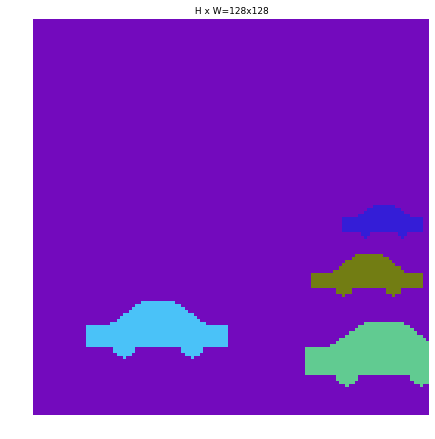

In [11]:
height , width = 128, 128
img_h, img_w = 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(4):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer
    max_range_x = width - buffer - 1
    min_range_y = height //2
    max_range_y = height - buffer - 1
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)          
    min_width = 12
    max_width = 26     
    ## scale width based on location on the image. Images closer to the bottom 
    ## will be larger
    sx = np.interp([y],[min_range_y, max_range_y], [min_width, max_width])
    ## old method
    ## sx = random.randint(min_width , max_width)
    sy = sx //2

    print('X :', x, 'y:', y , '     sx: ',sx , 'sy: ', sy)
    
    body_y  = sy //3
    wheel_x = sx //2
    wheel_r = sx //5
    top_x   = sx //4
    bot_x   = 3*sx //4
    image = cv2.rectangle(image, (x - sx, y - body_y), (x + sx, y + body_y), color, -1)    
    image = cv2.circle(image, (x - wheel_x , y + body_y), wheel_r, color, -1)     
    image = cv2.circle(image, (x + wheel_x , y + body_y), wheel_r, color, -1)     
    
    points = np.array([[(x - top_x , y - sy),   (x + top_x, y - sy),
                        (x + bot_x,  y - body_y),(x - bot_x, y - body_y), ]], dtype=np.int32)
    image = cv2.fillPoly(image, points, color)             
    
display_images([image], cols = 1, width = 8)

### Trees

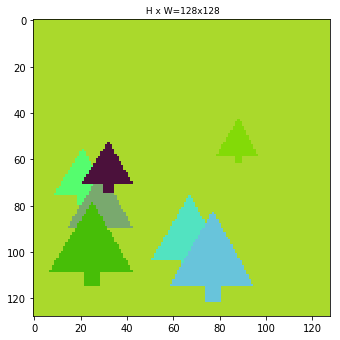

In [130]:
import cv2
height , width = 128, 128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 20
sin60 = math.sin(math.radians(60))

image = np.ones([height, width, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(7):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer  
    max_range_x = width - (buffer) - 1           
    min_range_y = height // 3
    max_range_y = width - (buffer) - 1    ##* min_range_y
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)                      
    min_height = 8
    max_height = 24
    sy = np.interp([y],[min_range_y, max_range_y], [min_height, max_height])    
#     sy = random.randint(min_height, max_height)            
    sx = sy
    
    ty = sy //3            # trunk length - 1/3 total length 
    by = sy - ty           # body length  ~ 2/3 total length
    tx = int((by /sin60)//5)   # trunk width
#    print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx, ' bx: ',bx)
    # orde of points: top, left, right
    points = np.array([[(x, y - by),
                        (x - (by / sin60), y + by),
                        (x + (by / sin60), y + by),
                        ]], dtype=np.int32)

    image = cv2.fillPoly(image, points, color)             
    image = cv2.rectangle(image,(x-tx,y+by), (x+tx, y+by+ty),color, -1)

# for i in range(5):
#     shape , color, dims = semi_random_shape(img_h, img_w )
#     image = semi_draw_shape(image , shape, dims ,color)

display_images([image], cols = 1, width = 6)

###  Airplane

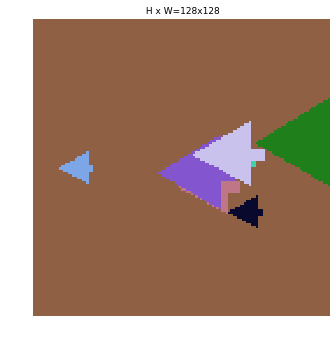

In [13]:
height , width = 128, 128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 20
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(7):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer //3
    max_range_x = width - (buffer//3) - 1           
    min_range_y = height //3
    max_range_y = 2* height // 3    ##* min_range_y
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)                      
    min_height = 8
    max_height = 24
    sy = random.randint(min_height, max_height)            
    sx = sy

### DRAW ------------------------------------------------    
    
    tx = sx //3            # trunk length - 1/3 of total length 
    bx = sx - tx           # body length
    by = (bx/sin60)        # body width
    ty = int(by//5)   # trunk width

#     print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx, ' bx: ',bx)
    sin60 = math.sin(math.radians(60))
    # orde of points: top, left, right
#     points = np.array([[(x, y - by),
#                         (x - (by / sin60), y + by),
#                         (x + (by / sin60), y + by),
#                         ]], dtype=np.int32)
    points = np.array([[(x - bx , y),
                        (x + bx , y - by),
                        (x + bx , y + by),
                        ]], dtype=np.int32)

    image = cv2.fillPoly(image, points, color)             
    image = cv2.rectangle(image,(x+bx,y-ty), (x+bx+tx, y+ty),color, -1)

# for i in range(5):
#     shape , color, dims = semi_random_shape(img_h, img_w )
#     image = semi_draw_shape(image , shape, dims ,color)

display_images([image], cols = 1, width = 6)

###  person

X : 32 y: 79 sx:  [2.] sy:  [13.3962]
X : 30 y: 79 sx:  [2.] sy:  [13.3962]
X : 74 y: 97 sx:  [3.] sy:  [17.4717]
X : 58 y: 88 sx:  [3.] sy:  [15.434]
X : 50 y: 105 sx:  [3.] sy:  [19.283]
X : 17 y: 105 sx:  [3.] sy:  [19.283]
X : 69 y: 83 sx:  [2.] sy:  [14.3019]


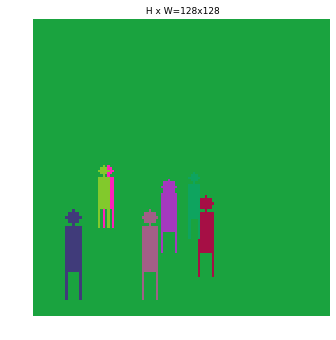

In [16]:
height , width = 128, 128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(7):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer
    max_range_x = width - buffer - 1
    min_range_y = (height //2)
    max_range_y = height - buffer - 1
    min_height = 10
    max_height = 22
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)
#     sy = random.randint(min_height, max_height)
    sy = np.interp([y],[min_range_y, max_range_y], [min_height, max_height]) 
    sx = sy // 5   # body width 
    
### DRAW ------------------------------------------------    
    
    hy = sy // 4   # head height
    by = sy - hy   # body height
    print('X :', x, 'y:', y , 'sx: ',sx , 'sy: ', sy)
    
    # torso
    image = cv2.rectangle(image, (x - sx, y - by), (x + sx, y + by//4), color, -1)    
    # legs
    image = cv2.rectangle(image, (x - sx, y + by//4), (x - sx +sx//4, y + by), color, -1)    
    image = cv2.rectangle(image, (x + sx - sx//4, y + by//4), (x + sx, y + by), color, -1)    
    #head
    image = cv2.circle(image, (x , y -(by+hy) ), sx, color, -1)     

display_images([image], cols = 1, width = 6)

###  Ellipse

sx:  [19.5455] sy:  [6.] tx/ty : 6
sx:  [19.5455] sy:  [4.] tx/ty : 6
sx:  [19.5455] sy:  [6.] tx/ty : 6


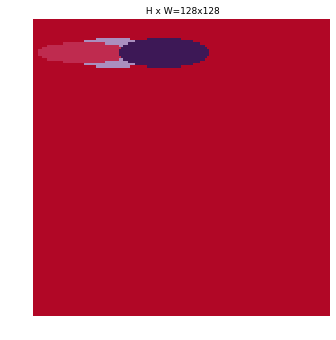

In [17]:
height , width = 128, 128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(3):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer//2 
    max_range_x = width - (buffer//2) - 1           
    min_range_y = buffer
    max_range_y = height //4
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)                      
    min_width , max_width  = 15, 40 
#     sx = random.randint(min_width, max_width)            
    sx = np.interp([y],[min_range_y, max_range_y], [min_width, max_width]) 
#     min_height ,max_height = 10, 20
#     sy = random.randint(min_height, max_height)            
    sy = sx //  random.randint(3, 5)
    
### DRAW ------------------------------------------------      
    
    print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx)
    image = cv2.ellipse(image,(x,y),(sx, sy),0,0,360,color,-1)

display_images([image], cols = 1, width = 6)

###  Routines that accept shape type and dimensions as inputs

In [ ]:
    
'''
-------------------------------------------------------------------------------
'''
def semi_random_image(self, height, width):
    '''
    Creates random specifications of an image with multiple shapes.
    Returns the background color of the image and a list of shape
    specifications that can be used to draw the image.
    '''
    # Pick random background color
    bg_color = np.array([random.randint(0, 255) for _ in range(3)])
    # Generate a few random shapes and record their
    # bounding boxes
    shapes = []
    boxes = []
    N = random.randint(1, 4)

    for _ in range(N):
        shape, color, dims = self.random_shape(height, width)
        shapes.append((shape, color, dims))
        x, y, sx, sy = dims
        boxes.append([y - sy, x - sx, y + sy, x + sx])

    # Suppress occulsions more than 0.3 IoU    
    # Apply non-max suppression with 0.3 threshold to avoid shapes covering each other
    keep_ixs = utils.non_max_suppression(np.array(boxes), np.arange(N), 0.3)

    shapes = [s for i, s in enumerate(shapes) if i in keep_ixs]

    # print('Original number of shapes {}  # after NMS {}'.format(N, len(shapes)))
    return bg_color, shapes

def semi_random_shape(height, width, shape = None, x = 0, y = 0, sx = 0, sy = 0):
    """Generates specifications of a random shape that lies within
    the given height and width boundaries.
    Returns a tuple of three valus:
    * The shape name (square, circle, ...)
    * Shape color: a tuple of 3 values, RGB.
    * Shape dimensions: A tuple of values that define the shape size
                        and location. Differs per shape type.
    """
    # Shape
    if shape is None:
        shape = random.choice(["square", "circle", "triangle", "rectangle"])
    # Color
    color = tuple([random.randint(0, 255) for _ in range(3)])
    # Center x, y
    buffer = 20
    if y == 0:
        y = random.randint(buffer, height - buffer - 1)
    if x == 0: 
        x = random.randint(buffer, width - buffer - 1)
    # Size
    if sx == 0 :
        sx = random.randint(buffer, width // 4)
    if shape == "rectangle" and sy == 0 :
        sy = random.randint(buffer, height // 4)
    else:
        sy = sx
#     print(' Shape : {}     Cntr (x,y) : ({} , {})    Size_x: {} Size_y: {}'.format(shape,x,y,sx, sy))    
    return shape, color, (x, y, sx, sy)

def semi_draw_shape(image, shape, dims, color):
    """Draws a shape from the given specs."""
    # Get the center x, y and the size s
    x, y, sx, sy = dims
    print(' Shape : {}     Cntr (x,y) : ({} , {})    Size_x: {} Size_y: {}'.format(shape,x,y,sx, sy))    
    if shape == 'square':
        image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)
    elif shape == 'rectangle':
        image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)        

    elif shape == "circle":
        image = cv2.circle(image, (x, y), sx, color, -1)

    elif shape == "triangle":
        sin60 = math.sin(math.radians(60))
        points = np.array([[(x, y - sx),
                            (x - (sx / sin60), y + sx),
                            (x + (sx / sin60), y + sx),
                            ]], dtype=np.int32)
#         print(' points.shape is : ',points.shape)
#         print(points)
        image = cv2.fillPoly(image, points, color)
    return image            

###  Non Max Suppression 

In [ ]:
from mrcnn.utils import compute_iou
def non_max_suppression(boxes, scores, threshold):
    """Performs non-maximum supression and returns indicies of kept boxes.
    boxes: [N, (y1, x1, y2, x2)]. Notice that (y2, x2) lays outside the box.
    scores: 1-D array of box scores.
    threshold: Float. IoU threshold to use for filtering.
    """
    assert boxes.shape[0] > 0
    if boxes.dtype.kind != "f":
        boxes = boxes.astype(np.float32)
    # print(' non_max_suppression ')
    # Compute box areas
    y1 = boxes[:, 0]
    x1 = boxes[:, 1]
    y2 = boxes[:, 2]
    x2 = boxes[:, 3]
    area = (y2 - y1) * (x2 - x1)

    # Get indicies of boxes sorted by scores (highest first)
    ixs = scores.argsort()[::-1]

    pick = []
    print('====> Initial Ixs: ', ixs)
    while len(ixs) > 0:
        # Pick top box and add its index to the list
        i = ixs[0]
        cy = y1[i] + (y2[i]-y1[i])//2
        cx = x1[i] + (x2[i]-x1[i])//2
        print('     ix : ', ixs, 'ctr (x,y)', cx,' ',cy,' box:', boxes[i], ' compare ',i, ' with ', ixs[1:])
        pick.append(i)
        
        # Compute IoU of the picked box with the rest
        iou = compute_iou(boxes[i], boxes[ixs[1:]], area[i], area[ixs[1:]])
        print('     ious:', iou)
        # Identify boxes with IoU over the threshold. This
        # returns indicies into ixs[1:], so add 1 to get
        # indicies into ixs.
        tst =  np.where(iou>threshold)
        remove_ixs = np.where(iou > threshold)[0] + 1
        print('     np.where( iou > threshold) : ' ,tst, 'tst[0] (index into ixs[1:]: ', tst[0], 
         ' remove_ixs (index into ixs) : ',remove_ixs)
        
        # Remove indicies of the picked and overlapped boxes.
        ixs = np.delete(ixs, remove_ixs)
        ixs = np.delete(ixs, 0)
        print(' ending ixs (after deleting ixs[0]): ', ixs, ' picked so far: ',pick)
    print('====> Final Picks: ', pick)
    return np.array(pick, dtype=np.int32)



###  NewShape Class Definition

In [ ]:
class NewShapesConfig(ShapesConfig):
    '''
    Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    '''
    # Give the configuration a recognizable name
#     NAME = "shapes"

    # Number of classes (including background)
    NUM_CLASSES = 1 + 4  # background + 3 shapes


class NewShapesDataset(Dataset):
    '''
    Generates the shapes synthetic dataset. The dataset consists of simple
    shapes (triangles, squares, circles) placed randomly on a blank surface.
    The images are generated on the fly. No file access required.
    '''

    def load_shapes(self, count, height, width):
        '''
        Generate the requested number of synthetic images.
        count: number of images to generate.
        height, width: the size of the generated images.
        '''
        
        # Add classes
        self.add_class("shapes", 1, "circle")  # used to be class 2
        self.add_class("shapes", 2, "square")  # used to be class 1
        self.add_class("shapes", 3, "triangle")
        self.add_class("shapes", 4, "rectangle")
        self.add_class("shapes", 5, "person")
        self.add_class("shapes", 6, "car")
        self.add_class("shapes", 7, "sun")
        self.add_class("shapes", 8, "building")
        self.add_class("shapes", 9, "tree")
        self.add_class("shapes",10, "cloud")

        # Add images
        # Generate random specifications of images (i.e. color and
        # list of shapes sizes and locations). This is more compact than
        # actual images. Images are generated on the fly in load_image().
        for i in range(count):
            bg_color, shapes = self.random_image(height, width)
            self.add_image("shapes", image_id=i, path=None,
                           width=width, height=height,
                           bg_color=bg_color, shapes=shapes)

    def load_image(self, image_id):
        '''
        Generate an image from the specs of the given image ID.
        Typically this function loads the image from a file, but in this case it
        generates the image on the fly from the specs in image_info.
        '''
        
        info = self.image_info[image_id]
        bg_color = np.array(info['bg_color']).reshape([1, 1, 3])
        
        image = np.ones([info['height'], info['width'], 3], dtype=np.uint8)
        image = image * bg_color.astype(np.uint8)
        print(" Load Image ")
        pp.pprint(info['shapes'])

        #--------------------------------------------------------------------------------
        # rearrange the shapes by ascending Y, so that items closer to bottom of 
        # image overlay items further up
        #--------------------------------------------------------------------------------
        sort_lst = [itm[2][1] for itm in info['shapes']]
        sorted_shape_ind = np.argsort(np.array(sort_lst))
        
        for shape_ind in sorted_shape_ind:
#             print(' shape ind :', shape_ind, 'shape', shape, ' color:', color,' dims ',dims)
            shape, color, dims =  info['shapes'][shape_ind]
            image = self.draw_shape(image, shape, dims, color)
        return image

    
    def image_reference(self, image_id):
        """Return the shapes data of the image."""
        info = self.image_info[image_id]
        if info["source"] == "shapes":
            return info["shapes"]
        else:
            super(self.__class__).image_reference(self, image_id)    

            
    def load_mask(self, image_id):
        '''
        Generate instance masks for shapes of the given image ID.
        '''
        # print(' Loading shapes obj mask infofor image_id : ',image_id)
        info   = self.image_info[image_id]
        shapes = info['shapes']
        # print('\n Load Mask information (shape, (color rgb), (x_ctr, y_ctr, size) ): ')
        # pp.pprint(info['shapes'])
        count  = len(shapes)
        mask   = np.zeros([info['height'], info['width'], count], dtype=np.uint8)
        
        print(' Shapes obj mask shape is :',mask.shape)
        for i, (shape, _, dims) in enumerate(info['shapes']):
            mask[:, :, i:i + 1] = self.draw_shape(mask[:, :, i:i + 1].copy(), shape, dims, 1)
        
        # Handle occlusions
        occlusion = np.logical_not(mask[:, :, -1]).astype(np.uint8)
        for i in range(count - 2, -1, -1):
            mask[:, :, i] = mask[:, :, i] * occlusion
            occlusion = np.logical_and(
                occlusion, np.logical_not(mask[:, :, i]))
        
        # Map class names to class IDs.
        class_ids = np.array([self.class_names.index(s[0]) for s in shapes])
        return mask, class_ids.astype(np.int32)
    
    def draw_shape(self, image, shape, dims, color):
        """Draws a shape from the given specs."""
        # Get the center x, y and the size s
        x, y, sx, sy = dims
        print(' Shape : {:20s}   Cntr (x,y): ({:3d} , {:3d})    Size_x: {:3d}   Size_y: {:3d} {}'.format(shape,x,y,sx, sy,color))        
        
        if shape == "square":
            image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)

        elif shape in ["rectangle", "building"]:
            image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)        
#             print('X :', x, 'y:', y , '     sx: ',sx , 'sy: ', sy, 'hs:', hs)
        
        elif shape == "car":
            body_y = sy //3
            wheel_x = sx //2
            wheel_r = sx //5
            top_x   = sx //4
            bot_x   = 3*sx //4
            image = cv2.rectangle(image, (x - sx, y - body_y), (x + sx, y + body_y), color, -1)    
            image = cv2.circle(image, (x - wheel_x , y + body_y), wheel_r, color, -1)     
            image = cv2.circle(image, (x + wheel_x , y + body_y), wheel_r, color, -1)     

            points = np.array([[(x - top_x , y - sy),   (x + top_x, y - sy),
                                (x + bot_x,  y - body_y),(x - bot_x, y - body_y), ]], dtype=np.int32)
            image = cv2.fillPoly(image, points, color)                     
            
        elif shape == "person":
#             hy = sy // 4   # head height
#             by = sy - hy   # body height
#             print('X :', x, 'y:', y , 'sx: ',sx , 'sy: ', sy, 'hs:', hs)                         
#             image = cv2.rectangle(image, (x - sx, y - by), (x + sx, y + by), color, -1)    
#             image = cv2.circle(image, (x , y -(by+hy) ), sx, color, -1)            

            hy = sy // 4   # head height
            by = sy - hy   # body height
#             print('X :', x, 'y:', y , 'sx: ',sx , 'sy: ', sy, 'hs:', hs)            
            # torso
            image = cv2.rectangle(image, (x - sx, y - by), (x + sx, y + by//4), color, -1)    
            # legs
            image = cv2.rectangle(image, (x - sx, y + by//4), (x - sx +sx//4, y + by), color, -1)    
            image = cv2.rectangle(image, (x + sx - sx//4, y + by//4), (x + sx, y + by), color, -1)    
            #head
            image = cv2.circle(image, (x , y -(by+hy) ), sx, color, -1)           
        elif shape in ["circle", "sun"]:
            image = cv2.circle(image, (x, y), sx, color, -1)

        elif shape in ["cloud", "ellipse"]:
            image = cv2.ellipse(image,(x,y),(sx, sy),0,0,360,color,-1)            

        elif shape == "triangle":
            sin60 = math.sin(math.radians(60))
            # orde of points: top, left, right
            points = np.array([[(x, y - sx),
                                (x - (sx / sin60), y + sx),
                                (x + (sx / sin60), y + sx),
                                ]], dtype=np.int32)
            image = cv2.fillPoly(image, points, color)
        
        elif shape == "tree":
            sin60 = math.sin(math.radians(60))
            ty = sy //3            # trunk length
            by = sy - ty           # body length
            tx = int((by /sin60)//5)   # trunk width
        #     print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx, ' bx: ',bx)
            sin60 = math.sin(math.radians(60))
            # orde of points: top, left, right
            points = np.array([[(x, y - by),
                                (x - (by / sin60), y + by),
                                (x + (by / sin60), y + by),
                                ]], dtype=np.int32)
            image = cv2.fillPoly(image, points, color)             
            image = cv2.rectangle(image,(x-tx,y+by), (x+tx, y+by+ty),color, -1)                      
            
        return image            

    def random_shape(self, shape, height, width):
        """Generates specifications of a random shape that lies within
        the given height and width boundaries.
        Returns a tuple of three valus:
        * The shape name (square, circle, ...)
        * Shape color: a tuple of 3 values, RGB.
        * Shape dimensions: A tuple of values that define the shape size
                            and location. Differs per shape type.
        """
        # Shape
#         shape = random.choice(["square", "circle", "triangle", "rectangle", "person", "car"])
        
        # Color
        color = tuple([random.randint(0, 255) for _ in range(3)])
        buffer = 20
        
        if shape == "person":
            min_range_x = buffer
            max_range_x = width - buffer - 1
#             min_range_y = (height //3) * 2
            min_range_y = (height //2)
            max_range_y = height - buffer - 1
            min_height = 10
            max_height = 22
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)
#             sy = random.randint(min_height, max_height)
            sy = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))
            sx = sy //5    # body width 

        elif shape == "car":
#             min_range_x = buffer
#             max_range_x = width - buffer - 1
#             min_range_y = height //2
#             max_range_y = height - buffer - 1
#             min_width = 12
#             max_width = 15
#             x = random.randint(min_range_x, max_range_x)
#             y = random.randint(min_range_y, max_range_y)            
#             sx = random.randint(min_width , max_width)
#             sy = sx //3 

            min_range_x = buffer
            max_range_x = width - buffer - 1
            min_range_y = height //2
            max_range_y = height - buffer - 1

            min_width = 15
            max_width = 30 
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)            
            ## scale width based on location on the image. Images closer to the bottom 
            ## will be larger
            sx = int(np.interp([y],[min_range_y, max_range_y], [min_width, max_width]))
            ## old method
            ## sx = random.randint(min_width , max_width)            
            sy = sx //2            
            
        elif shape == "building":            
            min_range_x = buffer
            max_range_x = width - buffer - 1           
            min_range_y = height //3
            max_range_y = 3 * height //4   ##* min_range_y
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)            
            min_height = 10
            max_height = 30
            sy = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))
            #     sy = random.randint(min_height, max_height)
            #     sx = random.randint(5,15)
            sx = sy //2 + 5            
            
        elif shape == "sun":
            min_range_x = buffer //3
            max_range_x = width - (buffer//3) - 1           
            min_range_y = buffer //3
            max_range_y = height //5    ##* min_range_y
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)                      
            min_height = 4
            max_height = 10
            sx = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))
#             sx = random.randint(min_height, max_height)            
            sy = sx

        elif shape == "tree":
            min_range_x = buffer  
            max_range_x = width - (buffer) - 1           
            min_range_y = height // 3
            max_range_y = width - (buffer) - 1    ##* min_range_y
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)                      
            min_height = 8
            max_height = 24
            sy = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))    
            #     sy = random.randint(min_height, max_height)            
            sx = sy
                      
        elif shape == "cloud":               
            min_range_x = buffer//2 
            max_range_x = width - (buffer//2) - 1           
            min_range_y = buffer
            max_range_y = height //4
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)                      
            min_width , max_width  = 15, 40 
        #     sx = random.randint(min_width, max_width)            
            sx = int(np.interp([y],[min_range_y, max_range_y], [min_width, max_width]))
        #     min_height ,max_height = 10, 20
        #     sy = random.randint(min_height, max_height)            
            sy = sx //  random.randint(3, 5)
                    
        else :
            min_range_x = buffer
            min_range_y = buffer
            max_range_x = width - buffer - 1
            max_range_y = height - buffer - 1
            min_size_x  = buffer
            max_size_x  = width // 4
            min_size_y  = buffer
            max_size_y  = height //4 

            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)
            sx = random.randint(min_size_x, max_size_x)

            if shape == "rectangle":
                sy = random.randint(min_size_y, max_size_y)    
            else:
                ## other shapes have same sx and sy             
                sy = sx

        return  color, (x, y, sx, sy)
    
    def random_image(self, height, width):
        '''
        Creates random specifications of an image with multiple shapes.
        Returns the background color of the image and a list of shape
        specifications that can be used to draw the image.
        '''
        # Pick random background color
        bg_color = np.array([random.randint(0, 255) for _ in range(3)])

        # Generate a few random shapes and record their
        # bounding boxes
        tmp_shapes = []
        shapes = []
        boxes  = []
        N = random.randint(1, 7)
        shape_choices = ["person", "car", "sun", "building", "tree", "cloud"]
        
        for _ in range(N):
            shape = random.choice(shape_choices)            
            color, dims = self.random_shape(shape, height, width)
            tmp_shapes.append((shape, color, dims))
            if shape == "sun":
                shape_choices.remove("sun")
            x, y, sx, sy = dims
#             boxes.append([y - sy, x - sx, y + sy, x + sx])

        #--------------------------------------------------------------------------------
        # order shape objects based on closeness to bottom of image
        # this will result in items closer to the viewer have higher priority in NMS
        #--------------------------------------------------------------------------------
        print(" Random Image Routine ")
        pp.pprint(tmp_shapes)

        sort_lst = [itm[2][1] for itm in tmp_shapes]
        print(sort_lst)
        sorted_shape_ind = np.argsort(np.array(sort_lst))[::-1]
        print(sorted_shape_ind)
        
        for i in sorted_shape_ind:
            shapes.append(tmp_shapes[i])
            x, y, sx, sy = tmp_shapes[i][2]
            boxes.append([y - sy, x - sx, y + sy, x + sx])            
            
        print('=== Sahpes after sorting ===')
        pp.pprint(shapes)
        pp.pprint(boxes)
        # Suppress occulsions more than 0.3 IoU    
        # Apply non-max suppression with 0.3 threshold to avoid shapes covering each other
        # object scores (which dictate the priority) are assigned in the order they were created
        print('===== non-max-suppression =====')
        keep_ixs =  non_max_suppression(np.array(boxes), np.arange(N), 0.29)
        
        shapes = [s for i, s in enumerate(shapes) if i in keep_ixs]
        
        print('===> Original number of shapes {}  # after NMS {}'.format(N, len(shapes)))
        return bg_color, shapes    
    
    

In [ ]:
def make_image():
    img = np.zeros((500, 500), np.uint8)
    black, white = 0, 255
    for i in range(6):
        dx = int((i%2)*250 - 30)
        dy = int((i/2.)*150)

        if i == 0:
            for j in range(11):
                angle = (j+5)*np.pi/21
                c, s = np.cos(angle), np.sin(angle)
                x1, y1 = np.int32([dx+100+j*10-80*c, dy+100-90*s])
                x2, y2 = np.int32([dx+100+j*10-30*c, dy+100-30*s])
                cv2.line(img, (x1, y1), (x2, y2), white)

        cv2.ellipse( img, (dx+150, dy+100), (100,70), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+115, dy+70), (30,20), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+185, dy+70), (30,20), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+115, dy+70), (15,15), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+185, dy+70), (15,15), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+115, dy+70), (5,5), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+185, dy+70), (5,5), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+150, dy+100), (10,5), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+150, dy+150), (40,10), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+27, dy+100), (20,35), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+273, dy+100), (20,35), 0, 0, 360, white, -1 )
    return img

# if __name__ == '__main__':
#     print(__doc__)

In [ ]:
    img = make_image()
    h, w = img.shape[:2]

    image, contours0, hierarchy = cv2.findContours( img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     print(contours0.shape)
    contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours0]

    def update(levels):
        vis = np.zeros((h, w, 3), np.uint8)
        levels = levels - 3
        cv2.drawContours( vis, contours, (-1, 2)[levels <= 0], (128,255,255),
            3, cv2.LINE_AA, hierarchy, abs(levels) )
        cv2.imshow('contours', vis)
    update(3)
    cv2.createTrackbar( "levels+3", "contours", 3, 7, update )
    cv2.imshow('image', img)
    cv2.waitKey()
    cv2.destroyAllWindows()